## 타이타닉 데이터셋 시각화

* survived: 생존 여부를 나타내며, 0은 사망, 1은 생존을 의미합니다.
* pclass: 티켓 클래스를 나타내며, 1은 1등석, 2는 2등석, 3은 3등석을 의미합니다.
* sex: 승객의 성별을 나타냅니다.
* age: 승객의 나이입니다. 일부는 추정치일 수 있습니다.
* sibsp: 함께 탑승한 형제자매 또는 배우자의 수입니다.
* parch: 함께 탑승한 부모 또는 자녀의 수입니다.
* fare: 티켓 요금입니다.
* embarked: 승선한 항구를 나타냅니다. C는 셰르부르, Q는 퀸즈타운, S는 사우샘프턴입니다.
* class: 티켓의 클래스를 카테고리 형식으로 나타냅니다. pclass와 동일한 정보를 카테고리 형태로 제공합니다.
* who: 승객을 'man', 'woman', 'child'로 분류한 데이터입니다.
* adult_male: 성인 남성인지 여부를 나타내는 불리언 값입니다.
* deck: 객실이 위치한 데크(갑판)를 나타내며, 일부 확장된 데이터셋에만 포함된 정보입니다.
* embark_town: 승선한 항구의 이름입니다. embarked 컬럼의 정보를 문자열로 제공합니다.
* alive: 생존 여부를 'yes', 'no'로 나타낸 데이터입니다. survived 컬럼과 동일한 정보를 문자열로 제공합니다.
* alone: 승객이 혼자 탑승했는지 여부를 나타내는 불리언 값입니다. sibsp와 parch의 합이 0이면 True, 그렇지 않으면 False입니다.

In [2]:
import seaborn as sns
import matplotlib.pylab as plt
import koreanize_matplotlib

In [10]:
import pandas as pd
import numpy as np

In [6]:
df_titanic = sns.load_dataset('titanic')
df_titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [8]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [9]:
df_titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df_titanic.describe(exclude=np.number)

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891,889,891,891,891,203,889,891,891
unique,2,3,3,3,2,7,3,2,2
top,male,S,Third,man,True,C,Southampton,no,True
freq,577,644,491,537,537,59,644,549,537


In [15]:
df_titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [19]:
# 생존자와 사망자수
print(df_titanic['survived'].value_counts())
print(df_titanic['survived'].value_counts(normalize=True)*100)

survived
0    549
1    342
Name: count, dtype: int64
survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


In [22]:
# 클래스별 승객 수
print(df_titanic['class'].unique())
print(df_titanic['class'].value_counts())
print(df_titanic['class'].value_counts(normalize=True)*100)

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']
class
Third     491
First     216
Second    184
Name: count, dtype: int64
class
Third     55.106622
First     24.242424
Second    20.650954
Name: proportion, dtype: float64


In [24]:
# 성별 생존율
df_titanic.groupby('sex').agg({'survived':'mean'})*100

,survived
sex,
female,74.203822
male,18.890815


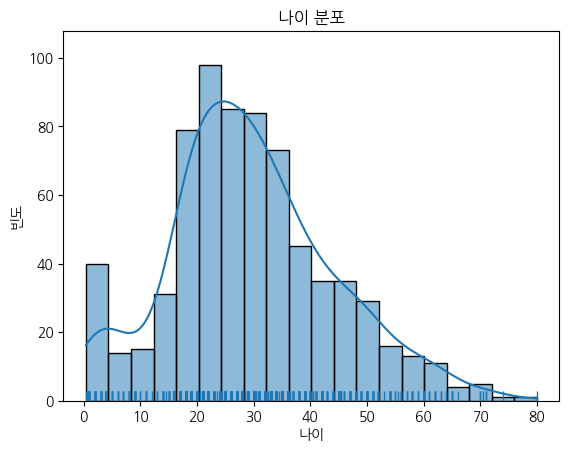

In [27]:
# 나이 분포 - histplot
sns.histplot(data=df_titanic['age'],bins=20,kde=True)
sns.rugplot(data=df_titanic['age'])
plt.title('나이 분포')
plt.xlabel('나이')
plt.ylabel('빈도')
plt.show()

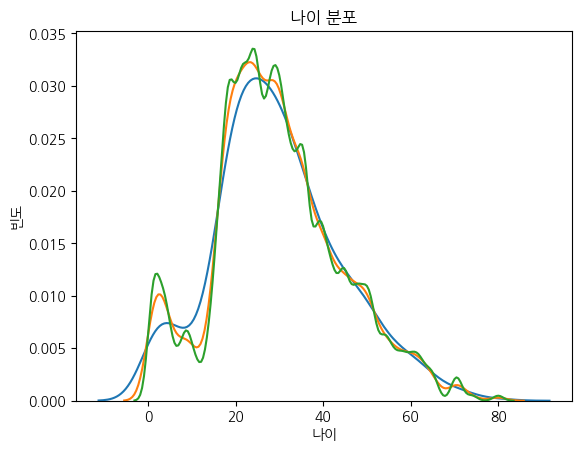

In [31]:
# 나이 분포 - kdeplot
# bw_adjust(대역폭-bandwidth) : 수치가 적을수록 거칠게, 클수록 완만하게 표현
sns.kdeplot(data=df_titanic['age'])
sns.kdeplot(data=df_titanic['age'],bw_adjust=.5)
sns.kdeplot(data=df_titanic['age'],bw_adjust=.3)
plt.title('나이 분포')
plt.xlabel('나이')
plt.ylabel('빈도')
plt.show()

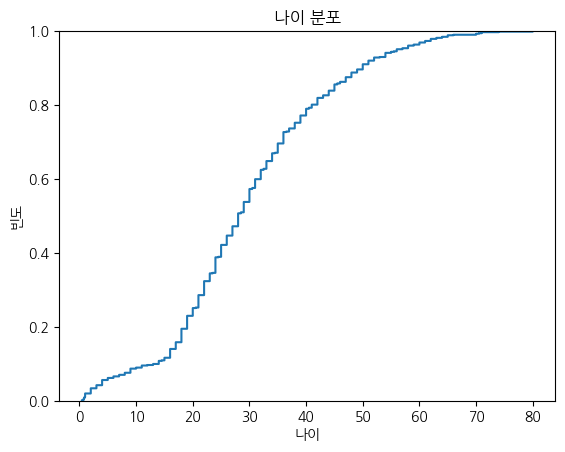

In [32]:
# 나이 분포 - ecdfplot
sns.ecdfplot(data=df_titanic['age'])
plt.title('나이 분포')
plt.xlabel('나이')
plt.ylabel('빈도')
plt.show()

In [33]:
# 클래스별 평균 운임
df_titanic.groupby('class').agg({'fare':'mean'})

C:\Users\kh502\AppData\Local\Temp\ipykernel_12292\3286682358.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_titanic.groupby('class').agg({'fare':'mean'})


,fare
class,
First,84.154687
Second,20.662183
Third,13.675550


In [36]:
# 승객나이의 중앙값과 평균
print(df_titanic['age'].median())
print(df_titanic['age'].mean())

28.0
29.69911764705882


In [38]:
# 가장 높은 운임을 낸 승객 정보
df_titanic[df_titanic['fare'] == df_titanic['fare'].max()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True


In [43]:
# 각 클래스별 생존자 수
df_titanic.groupby('class').agg({'survived':'sum'})

C:\Users\kh502\AppData\Local\Temp\ipykernel_12292\2585272302.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_titanic.groupby('class').agg({'survived':'sum'})


,survived
class,
First,136
Second,87
Third,119


<Axes: xlabel='class', ylabel='survived'>

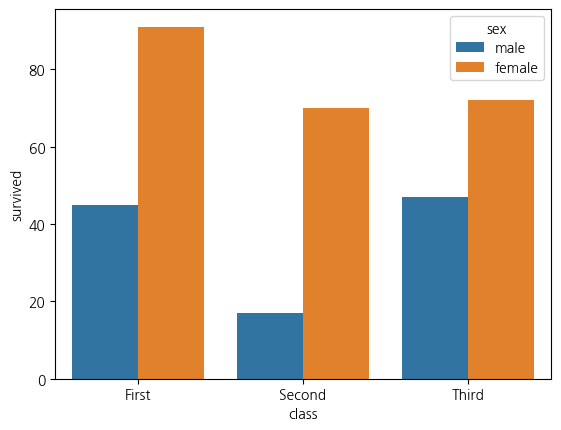

In [48]:
# 각 클래스별 생존자 수 - 막대 그래프
sns.barplot(data=df_titanic, x='class' ,y='survived', estimator=np.sum, errorbar=None, hue='sex')

In [ ]:
sns.FacetGrid?

#### 주요 색상 팔레트 종류
1. 기본 팔레트
- deep: 기본적인 색상 팔레트로, 다양한 색상을 포함합니다.
- muted: 좀 더 부드러운 색상으로 구성된 팔레트입니다.
- bright: 밝고 선명한 색상으로 구성된 팔레트입니다.
- pastel: 부드럽고 연한 색상으로 구성된 팔레트입니다.
- dark: 어두운 색상으로 구성된 팔레트입니다.
- colorblind: 색맹을 고려한 색상 조합으로 구성된 팔레트입니다.
2. 특정 색상 팔레트
- Set1, Set2, Set3: 여러 색상으로 구성된 팔레트로, 범주형 데이터에 적합합니다.
- Paired: 쌍으로 구성된 색상으로, 범주형 데이터에 적합합니다.
- Accent: 다양한 색상으로 구성된 팔레트로, 범주형 데이터에 적합합니다.
3. 그라디언트 팔레트
- Blues: 파란색 계열의 그라디언트 팔레트입니다.
- Greens: 초록색 계열의 그라디언트 팔레트입니다.
- Reds: 빨간색 계열의 그라디언트 팔레트입니다.
- Purples: 보라색 계열의 그라디언트 팔레트입니다.
- Oranges: 주황색 계열의 그라디언트 팔레트입니다.
- Greys: 회색 계열의 그라디언트 팔레트입니다.
4. 기타 팔레트
- cubehelix: 색상 변화가 부드러운 팔레트로, 흑백 인쇄에도 적합합니다.
- crest: 색상 변화가 부드러운 팔레트로, 주로 데이터의 강도를 나타내는 데 사용됩니다.
- rocket: 색상 변화가 부드러운 팔레트로, 데이터의 강도를 나타내는 데 사용됩니다.
- mako: 색상 변화가 부드러운 팔레트로, 데이터의 강도를 나타내는 데 사용됩니다.

In [101]:
# 사용자 정의 색상 팔레트
custom_palette = {
    'man': 'blue',
    'woman': 'pink',
    'child': 'green'
}

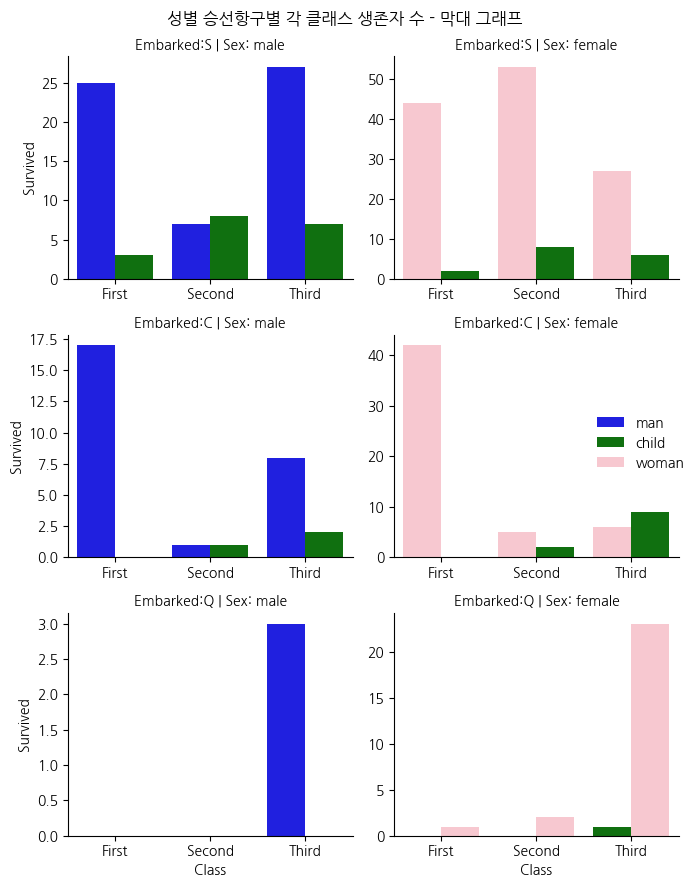

In [104]:
g = sns.FacetGrid(data=df_titanic, col='sex', row='embarked', sharex=False, sharey=False)
# g.map_dataframe(sns.barplot, x='class', y='survived',  hue='who', estimator=np.sum, errorbar=None, palette='Greens')
g.map_dataframe(sns.barplot, x='class', y='survived',  hue='who', estimator=np.sum, errorbar=None, palette=custom_palette)

# 그래프 제목 및 레이블 설정
g.set_axis_labels('Class', 'Survived')
g.set_titles(col_template='Sex: {col_name}', row_template='Embarked:{row_name}')
g.add_legend()

# 전체 figure 제목추가
plt.suptitle('성별 승선항구별 각 클래스 생존자 수 - 막대 그래프')
plt.tight_layout()
plt.show()

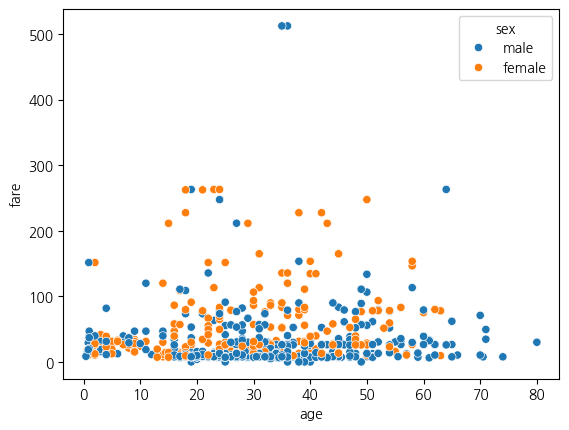

In [110]:
# 나이와 운임간의 관계표현 - scatterplot
sns.scatterplot(data=df_titanic, x='age', y='fare', hue='sex')
plt.show()

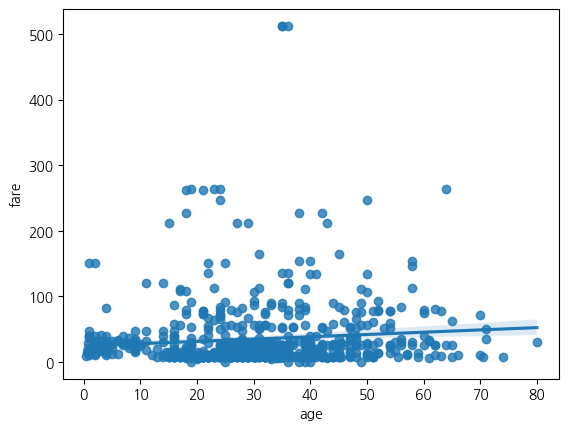

In [111]:
# 나이와 운임간의 관계표현 - regplot
sns.regplot(data=df_titanic, x='age', y='fare')
plt.show()

In [118]:
# 모든 수치형 변수간의 상관 관계 - 상관계수 구하기 corr() : -1 ~ 1
tmp = df_titanic.select_dtypes(np.number).corr()
tmp.style.background_gradient()

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


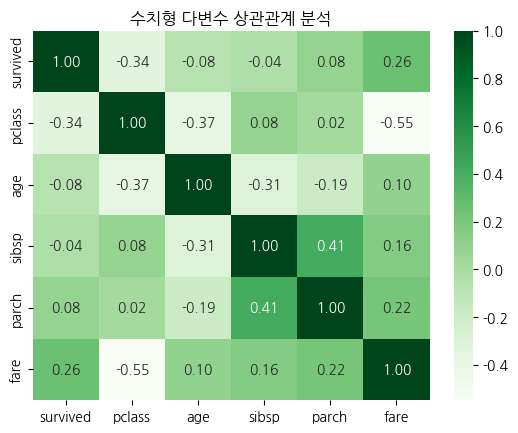

In [127]:
# 히트맵 : 다변수(수치형) 상관관계 분석 시각화
sns.heatmap(data=tmp, annot=True,fmt='.2f',cmap='Greens')
plt.title('수치형 다변수 상관관계 분석')
plt.show()

<Axes: xlabel='class', ylabel='fare'>

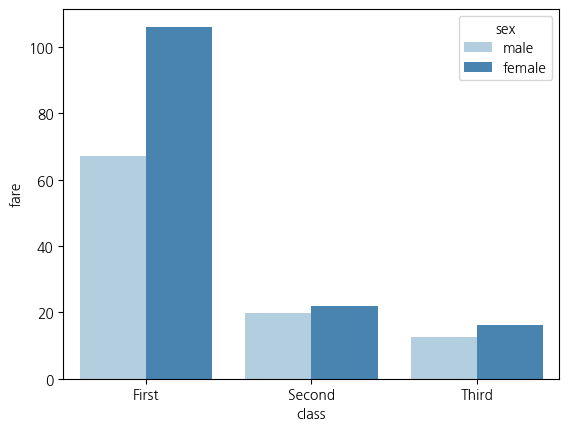

In [134]:
# 각 클래스에 따른 운임 평균 - 막대그래프
sns.barplot(data=df_titanic, x='class', y='fare', hue='sex', palette='Blues',errorbar=None)

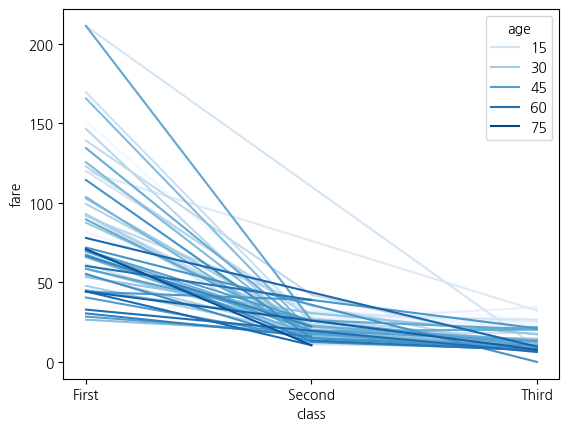

In [137]:
# 각 클래스에 따른 운임 평균 - 선 그래프
sns.lineplot(data=df_titanic, x='class', y='fare', hue='age', palette='Blues',errorbar=None, estimator=np.mean)
plt.show()

<Axes: xlabel='class', ylabel='age'>

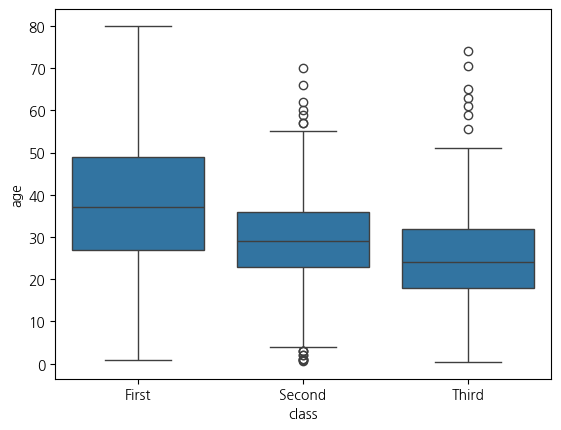

In [139]:
# 각 클래스별 나이 분포 - 박스플롯
sns.boxplot(data=df_titanic, x='class', y='age')

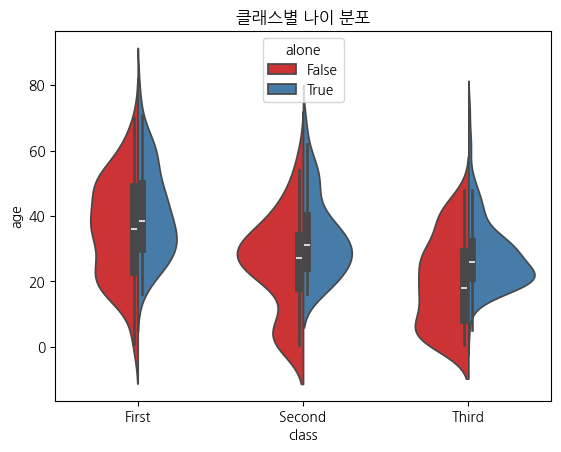

In [146]:
# 각 클래스별 나이 분포 - 바이올린 플롯
sns.violinplot(data=df_titanic, x='class', y='age', hue='alone', split=True, palette='Set1')
plt.title('클래스별 나이 분포')
plt.show()

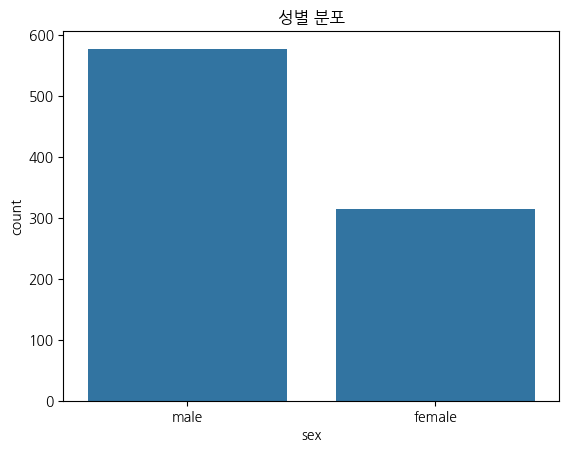

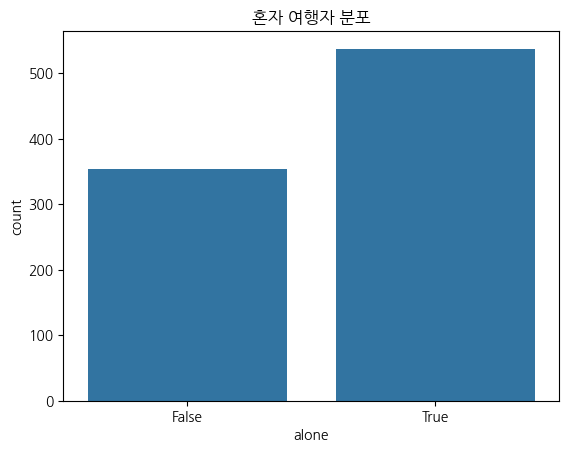

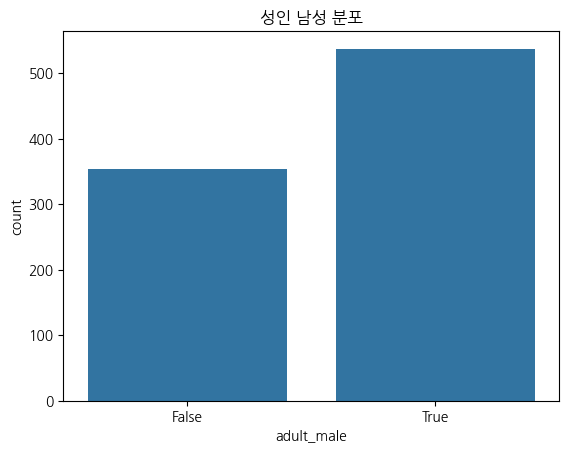

In [153]:
# 탑승객 분포
sns.countplot(data=df_titanic, x='sex')
plt.title('성별 분포')
plt.show()
sns.countplot(data=df_titanic, x='alone')
plt.title('혼자 여행자 분포')
plt.show()
sns.countplot(data=df_titanic, x='adult_male')
plt.title('성인 남성 분포')
plt.show()

In [158]:
sns.pairplot?

Signature:
sns.pairplot(
    data,
    *,
    hue=None,
    hue_order=None,
    palette=None,
    vars=None,
    x_vars=None,
    y_vars=None,
    kind='scatter',
    diag_kind='auto',
    markers=None,
    height=2.5,
    aspect=1,
    corner=False,
    dropna=False,
    plot_kws=None,
    diag_kws=None,
    grid_kws=None,
    size=None,
)
Docstring:
Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric
variable in ``data`` will by shared across the y-axes across a single row and
the x-axes across a single column. The diagonal plots are treated
differently: a univariate distribution plot is drawn to show the marginal
distribution of the data in each column.

It is also possible to show a subset of variables or plot different
variables on the rows and columns.

This is a high-level interface for :class:`PairGrid` that is intended to
make it easy to draw a few common styles. You should use :class:`PairGrid`
directly if you

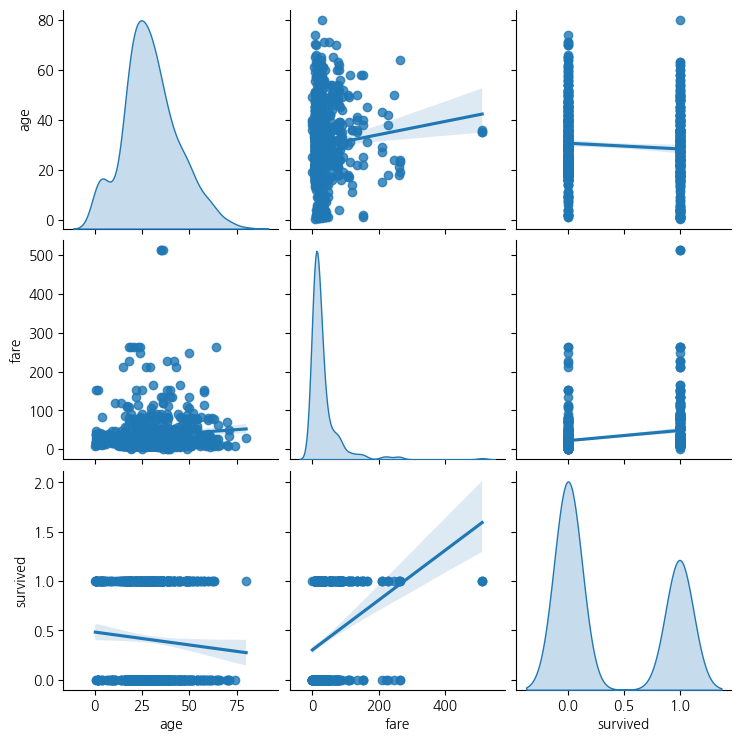

In [161]:
# age, fare, survived 변수간의 관계 표현 - pairplot
sns.pairplot(data=df_titanic[['age', 'fare', 'survived']],kind='reg' ,diag_kind='kde')
plt.show()

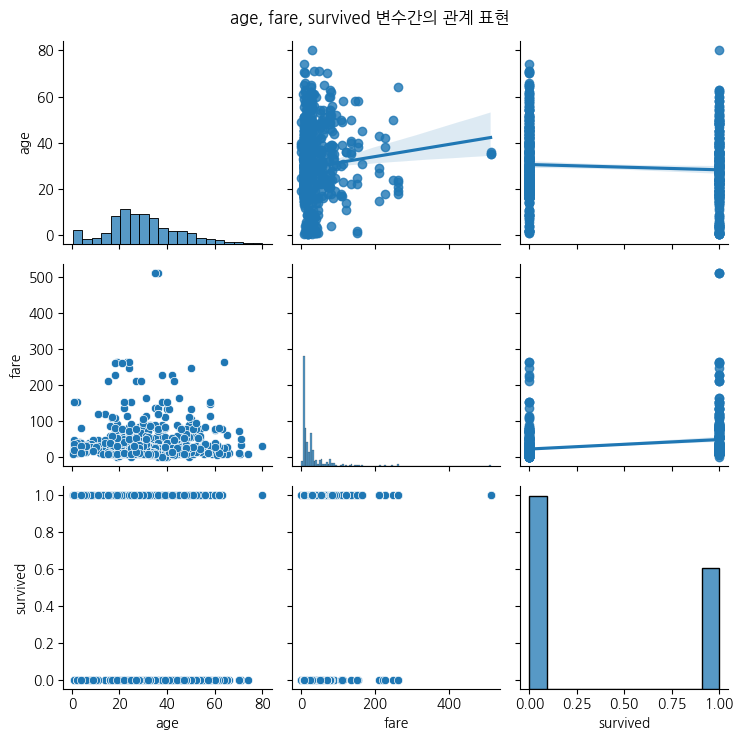

In [168]:
# age, fare, survived 변수간의 관계 표현 - pairplot
g = sns.PairGrid(data=df_titanic[['age', 'fare', 'survived']])
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.regplot)
plt.suptitle('age, fare, survived 변수간의 관계 표현')
plt.tight_layout()
plt.show()

In [171]:
sns.jointplot?

Signature:
sns.jointplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    kind='scatter',
    height=6,
    ratio=5,
    space=0.2,
    dropna=False,
    xlim=None,
    ylim=None,
    color=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    marginal_ticks=False,
    joint_kws=None,
    marginal_kws=None,
    **kwargs,
)
Docstring:
Draw a plot of two variables with bivariate and univariate graphs.

This function provides a convenient interface to the :class:`JointGrid`
class, with several canned plot kinds. This is intended to be a fairly
lightweight wrapper; if you need more flexibility, you should use
:class:`JointGrid` directly.

Parameters
----------
data : :class:`pandas.DataFrame`, :class:`numpy.ndarray`, mapping, or sequence
    Input data structure. Either a long-form collection of vectors that can be
    assigned to named variables or a wide-form dataset that will be internally
    reshaped.
x, y : vectors or keys in ``data``
    Variables that s

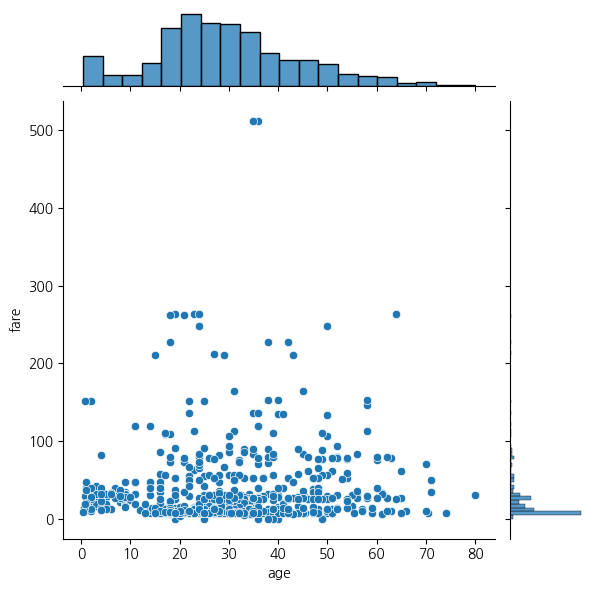

In [170]:
# 나이와 운임 관계 표현
sns.jointplot(data=df_titanic, x='age', y='fare')
plt.show()

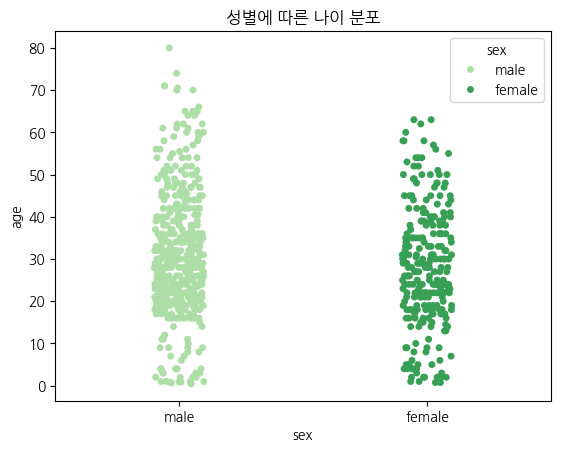

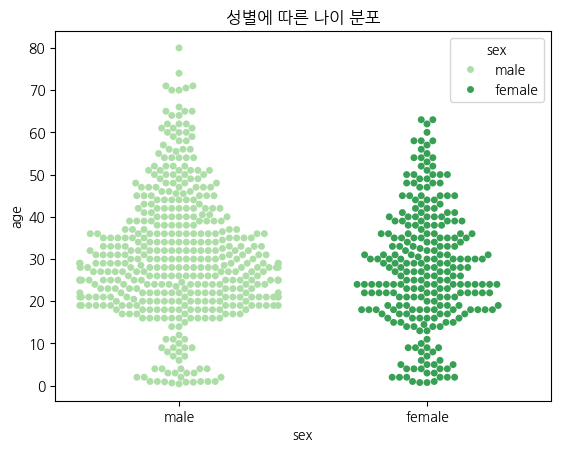

In [184]:
# 성별에 따른 나이 분포
# jitter : 데이터 포인트들 사이의 겹침을 줄이기 위해 사용함, 데이터 포인트가 많을때
sns.stripplot(data=df_titanic, x='sex', y='age', hue='sex', palette='Greens', legend=True, jitter=True)
plt.title('성별에 따른 나이 분포')
plt.legend(title='sex')
plt.show()
sns.swarmplot(data=df_titanic, x='sex', y='age',hue='sex', palette='Greens', legend=True)
plt.title('성별에 따른 나이 분포')
plt.legend(title='sex')
plt.show()